### 0. 기본설정

In [1]:
# # colab에서 싷행할 경우
# !pip install -U selenium bs4 requests finance-datareader

# 파일 저장 폴더생성
import os
PROJECT_ROOT_DIR = "./Stocks_output"
CHAPTER_ID = "ETF_KR"
SAMPLES_PATH = os.path.join(PROJECT_ROOT_DIR, "samples", CHAPTER_ID)
os.makedirs(SAMPLES_PATH, exist_ok=True)

#파일 경로 생성함수
def mkfile(file):
    PROJECT_ROOT_DIR = "./Stocks_output"
    CHAPTER_ID = "ETF_KR"
    PATH = os.path.join(PROJECT_ROOT_DIR, "samples", CHAPTER_ID)
    file_o = os.path.join(SAMPLES_PATH,f'{file}.xlsx')
    return file_o

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "./Stocks_output"
CHAPTER_ID = "ETF_KR"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    PROJECT_ROOT_DIR = "./Stocks_output"
    CHAPTER_ID = "ETF_KR"
    IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 결측치제거 및 scaling
def scale(df):
    from sklearn.preprocessing import MinMaxScaler
    import pandas as pd
    df = df.fillna(method='pad').dropna(axis=0)
    scaler = MinMaxScaler()
    scaler.fit(df)
    output = scaler.transform(df)
    output = pd.DataFrame(output, columns=df.columns, index=df.index.values)
    return output
    
# 시각화
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 불필요한 경고 무시
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 가격 및 차트 함수 설정
# 한 plot 내에 다수 차트 생성 
def price_plot(codes,period):
    from datetime import datetime,timedelta
    import FinanceDataReader as fdr
    for code in codes:
        df = pd.read_csv(etf, encoding = 'euckr', index_col=0)
        df['코드'] = df['코드'].astype(str)
        temp = [i for i in df[df['코드'].apply(lambda x: len(x))<=5].index]
        df.loc[temp,'코드'] = '0'+ df.loc[temp,'코드'].astype(str)
        e_date = datetime.now()
        s_date = e_date - timedelta(int(period))
        df_temp = fdr.DataReader(code, s_date ,e_date)
        name = df[df.코드 == code].종목명.values[0]
        df_kospi = fdr.DataReader('KS11', s_date ,e_date)
        df_temp['p_index'] = df_temp['Close'].apply(lambda x: x/df_temp.iloc[0,3])
        df_temp['p_index'].plot(legend = 'a',label= name, figsize=(16,8))
    df_kospi['p_index'] = df_kospi['Close'].apply(lambda x: x/df_kospi.iloc[0,3])
    df_kospi['p_index'].plot(color = 'grey',legend = 'a',label= 'KOSPI지수', figsize=(16,8))
        
# 다중 차트 만드는 함수  
def price_plot_s(codes,period,row,col, fig = (16,8)):
    import pandas as pd
    from datetime import datetime,timedelta
    import FinanceDataReader as fdr
    import matplotlib.pyplot as plt
    for idx, code in enumerate(codes):
        df = pd.read_csv(etf, encoding = 'euckr', index_col=0)
        df['코드'] = df['코드'].astype(str)
        temp = [i for i in df[df['코드'].apply(lambda x: len(x))<=5].index]
        df.loc[temp,'코드'] = '0'+ df.loc[temp,'코드'].astype(str)
        e_date = datetime.now()
        s_date = e_date - timedelta(int(period))
        df_temp = fdr.DataReader(code, s_date ,e_date)
        df_kospi = fdr.DataReader('KS11', s_date ,e_date)
        name = df[df.코드 == code].종목명.values[0]
                
        plt.subplot(row,col,idx+1) # subplot : 도화지를 나눔, 1행/2열로 나누고 첫번째도화지에...
        df_temp['p_index'] = df_temp['Close'].apply(lambda x: x/df_temp.iloc[0,3])
        df_temp['p_index'].plot(legend = 'a',label= name, figsize=fig)
        df_kospi['p_index'] = df_kospi['Close'].apply(lambda x: x/df_kospi.iloc[0,3])
        df_kospi['p_index'].plot(color = 'grey', legend = 'a',label= 'KOSPI지수', figsize=fig)

# 코드 리스트로 df 불러오기
def price_codes(codes, period):
    import pandas as pd
    import FinanceDataReader as fdr
    from datetime import datetime,timedelta
    import matplotlib.pyplot as plt
    df = pd.read_csv(etf, encoding = 'euckr', index_col=0)
    df['코드'] = df['코드'].astype(str)
    temp = [i for i in df[df['코드'].apply(lambda x: len(x))<=5].index]
    df.loc[temp,'코드'] = '0'+ df.loc[temp,'코드'].astype(str)

    e_date = datetime.now()
    s_date = e_date - timedelta(int(period))
    
    df_m = pd.DataFrame()
    df_m_index = pd.DataFrame()
    
    for code in codes:
        df_temp = fdr.DataReader(code, s_date ,e_date)
        name = df[df.코드 == code].종목명.values[0]
        df_temp['p_index'] = df_temp['Close'].apply(lambda x: x/df_temp.iloc[0,3])
        df_m[name] = df_temp['Close']
        df_m_index[name] = df_temp['p_index']
    df_kospi = fdr.DataReader('KS11', s_date ,e_date)
    df_cur = fdr.DataReader('USD/KRW', s_date ,e_date)
    df_kospi['p_index'] = df_kospi['Close'].apply(lambda x: x/df_kospi.iloc[0,3])
    df_cur['p_index'] = df_cur['Close'].apply(lambda x: x/df_cur.iloc[0,3])
    df_m_index['KOSPI'] = df_kospi['p_index'] 
    df_m_index['USD/KRW'] = df_cur['p_index'] 
    
    return df_m, df_m_index  
        
# 특정텍스트 포함 조건식을 걸어서 가격 df를 만드는 함수
def price_texts(유형,종목명, period):
    import pandas as pd
    import FinanceDataReader as fdr
    from datetime import datetime,timedelta
    import matplotlib.pyplot as plt
    df = pd.read_csv(etf, encoding = 'euckr', index_col=0)
    df['코드'] = df['코드'].astype(str)
    temp = [i for i in df[df['코드'].apply(lambda x: len(x))<=5].index]
    df.loc[temp,'코드'] = '0'+ df.loc[temp,'코드'].astype(str)
    
    if 유형 != 'None':
        codes = [code for code in df[df.유형.str.contains(유형)].코드]
        names = [n for n in df[df.유형.str.contains(유형)].종목명]
    elif 종목명 != 'None':
        codes = [code for code in df[df.종목명.str.contains(종목명)].코드]
        names = [n for n in df[df.종목명.str.contains(종목명)].종목명]
    print(f'해당종목은 {names}입니다.')
    e_date = datetime.now()
    s_date = e_date - timedelta(int(period))
    
    df_m = pd.DataFrame()
    df_m_index = pd.DataFrame()
    for code in codes:
        df_temp = fdr.DataReader(code, s_date ,e_date)
        name = df[df.코드 == code].종목명.values[0]
        df_temp['p_index'] = df_temp['Close'].apply(lambda x: x/df_temp.iloc[0,3])
        df_m[name] = df_temp['Close']
        df_m_index[name] = df_temp['p_index']
        
    df_kospi = fdr.DataReader('KS11', s_date ,e_date)
    df_cur = fdr.DataReader('USD/KRW', s_date ,e_date)
    df_kospi['p_index'] = df_kospi['Close'].apply(lambda x: x/df_kospi.iloc[0,3])
    df_cur['p_index'] = df_cur['Close'].apply(lambda x: x/df_cur.iloc[0,3])
    df_m_index['KOSPI'] = df_kospi['p_index'] 
    df_m_index['USD/KRW'] = df_cur['p_index'] 

    return df_m, df_m_index

# 구성종목 확인함수
def comp(codes):
    import requests
    import FinanceDataReader as fdr
    import pandas as pd
    df = pd.read_csv(etf, encoding = 'euckr', index_col=0)
    df['코드'] = df['코드'].astype(str)
    temp = [i for i in df[df['코드'].apply(lambda x: len(x))<=5].index]
    df.loc[temp,'코드'] = '0'+ df.loc[temp,'코드'].astype(str)
    
    df_l = []
    try:
        for idx, code in enumerate(codes):
            name = df[df.코드 == code].종목명.values[0]
            url = f'https://finance.naver.com/item/main.nhn?code={code}'
            html = requests.get(url).text
            dfs = pd.read_html(html)
            dfs_c = dfs[3]
            if len(dfs_c)>10 :
                if dfs_c['구성비중'][2]!='-':
                    dfs_c = dfs_c.dropna()[['구성종목(구성자산)','구성비중','등락률']]
                    dfs_c.columns = [name,f'구성비중{idx+1}',f'등락률{idx+1}']
                    df_l.append(dfs_c)
        df_m = pd.concat(df_l,axis=1)
    except:
        pass    
        df_m = pd.concat(df_l,axis=1)
    return df_m

# 구성종목2 확인함수(미국주식 등)
def comp_e(codes):
    import requests
    import FinanceDataReader as fdr
    import pandas as pd
    df = pd.read_csv(etf, encoding = 'euckr', index_col=0)
    df['코드'] = df['코드'].astype(str)
    temp = [i for i in df[df['코드'].apply(lambda x: len(x))<=5].index]
    df.loc[temp,'코드'] = '0'+ df.loc[temp,'코드'].astype(str)
    
    df_l = []
    try:
        for idx, code in enumerate(codes):
            name = df[df.코드 == code].종목명.values[0]
            url = f'https://finance.naver.com/item/main.nhn?code={code}'
            html = requests.get(url).text
            dfs = pd.read_html(html)
            dfs_c = dfs[3]
            if len(dfs_c)>10 :
                dfs_c = dfs_c.dropna()[['구성종목(구성자산)','주식수(계약수)']]
                dfs_c.columns = [name,f'주식수{idx+1}']
                df_l.append(dfs_c)
        df_m = pd.concat(df_l,axis=1)
    except:
        pass    
        df_m = pd.concat(df_l,axis=1)
    return df_m

### 1. 거래중인 ETF 리스트 확보 <br>
현재 시장에 거래중인 ETF 항목을 끌어온 후, 전처리, csv에 저장하였습니다.<br>
[리스트출처 : 증권예탁원 증권정보포털](https://seibro.or.kr/websquare/control.jsp?w2xPath=/IPORTAL/user/etf/BIP_CNTS06025V.xml&menuNo=174)

In [2]:
# df0생성
import pandas as pd
etf = mkfile('etf') 

df0 = pd.DataFrame()
cols = ['종목명','코드','유형','순자산','종가','거래량','3개월수익율','총보수','운용사']
lines = [1,2,3,4,5,6,9,15,16]
with open('ETF.txt','r') as f:
    data = f.readlines()
    
    for idx in range(len(cols)):
        df0[cols[idx]] = [j.replace('\n','') for i, j in enumerate(data) if i % 17 == lines[idx]]
    
# 전처리 : 보수, 수익율 없는 상품 제거
df0 = df0.drop(df0[df0['총보수']==''].index)
df0 = df0.drop(df0[df0['3개월수익율']==''].index)

# 전처리 : 계산 가능타입으로 변환
for j in cols[3:6]:
    df0[j] = df0[j].apply(lambda x: x.replace(',',''))
    df0[j] = df0[j].astype(int)
for j in cols[6:8]:
    df0[j] = df0[j].astype(float)

df0.to_csv(etf,sep=',',encoding='euc-kr')

print(f'추출한 총 ETF의 수 {len(df0)}개')

추출한 총 ETF의 수 549개


#### ETF : 3개월 수익율 순위
최근 수익율 기준으로 확인합니다.

In [3]:
df0.sort_values('3개월수익율',ascending =False)[:20]

,종목명,코드,유형,순자산,종가,거래량,3개월수익율,총보수,운용사
88,KODEX WTI원유선물(H),261220,상품/원유,1406,17125,541330,53.04,0.35,삼성자산운용
177,TIGER 원유선물Enhanced(H),130680,상품/원유,466,5140,427324,51.85,0.69,미래에셋자산운용
461,KBSTAR 팔라듐선물(H),334690,상품/금속,64,14970,22701,51.59,0.60,케이비자산운용
222,KODEX 미국S&P에너지(합성),218420,해외지수/해외지수,301,10300,86457,35.79,0.25,삼성자산운용
372,KODEX 콩선물(H),138920,상품/농산물,102,14625,8492,32.11,0.68,삼성자산운용
311,KODEX 3대농산물선물(H),271060,상품/농산물,144,14585,36361,31.51,0.55,삼성자산운용
198,KBSTAR 미국S&P원유생산기업(합성 H),219390,해외지수/해외지수,375,5595,225309,29.66,0.25,케이비자산운용
395,TIGER 금속선물(H),139310,상품/금속,88,8785,16417,24.61,0.69,미래에셋자산운용
204,TIGER 농산물선물Enhanced(H),137610,상품/농산물,351,8150,60550,22.28,0.69,미래에셋자산운용
295,TIGER 글로벌자원생산기업(합성 H),276000,해외지수/해외지수,157,16525,9164,20.05,0.40,미래에셋자산운용


In [4]:
df0.sort_values('3개월수익율',ascending =True)[:20]

,종목명,코드,유형,순자산,종가,거래량,3개월수익율,총보수,운용사
546,KINDEX 러시아MSCI(합성),265690,해외지수/해외지수,3,10070,72372,-67.83,0.50,한국투자신탁운용
343,TIGER KRX2차전지K-뉴딜레버리지,412570,파생상품/레버리지,113,5665,169635,-45.27,0.59,미래에셋자산운용
469,TIGER KRX BBIG K-뉴딜레버리지,412560,파생상품/레버리지,61,5805,86317,-42.64,0.59,미래에셋자산운용
133,TIGER 원유선물인버스(H),217770,파생상품/인버스,742,3290,942116,-38.96,0.69,미래에셋자산운용
117,KODEX WTI원유선물인버스(H),271050,파생상품/인버스,918,4735,1081775,-38.90,0.35,삼성자산운용
536,KBSTAR 팔라듐선물인버스(H),334700,파생상품/인버스,28,3780,9562,-37.93,0.60,케이비자산운용
566,KBSTAR 팔라듐선물인버스(H),334700,파생상품/인버스,28,3780,9562,-37.93,0.60,케이비자산운용
455,TIGER 200에너지화학레버리지,243890,파생상품/레버리지,65,13150,6156,-29.03,0.69,미래에셋자산운용
164,KODEX 차이나H레버리지(H),204450,파생상품/레버리지,513,3030,409491,-24.72,0.64,삼성자산운용
39,TIGER KRX2차전지K-뉴딜,364980,테마/기타,4020,12825,993152,-24.09,0.40,미래에셋자산운용


### 2. 파생상품 제외한 목록 만들기 (연금계좌 활용)

#### 연금용 ETF : 3개월 수익율 순위

In [5]:
a = '파생상품'
df1_0 = df0[~df0['유형'].str.contains(a)]
# print(df['유형'].unique())
# print()
# print(df1['유형'].unique())

# etf_연금 = mkfile('etf_연금') 
# df1.to_csv(etf_연금,sep=',',encoding='euc-kr')
df1_0.sort_values('3개월수익율',ascending =False)[:20]

,종목명,코드,유형,순자산,종가,거래량,3개월수익율,총보수,운용사
88,KODEX WTI원유선물(H),261220,상품/원유,1406,17125,541330,53.04,0.35,삼성자산운용
177,TIGER 원유선물Enhanced(H),130680,상품/원유,466,5140,427324,51.85,0.69,미래에셋자산운용
461,KBSTAR 팔라듐선물(H),334690,상품/금속,64,14970,22701,51.59,0.60,케이비자산운용
222,KODEX 미국S&P에너지(합성),218420,해외지수/해외지수,301,10300,86457,35.79,0.25,삼성자산운용
372,KODEX 콩선물(H),138920,상품/농산물,102,14625,8492,32.11,0.68,삼성자산운용
311,KODEX 3대농산물선물(H),271060,상품/농산물,144,14585,36361,31.51,0.55,삼성자산운용
198,KBSTAR 미국S&P원유생산기업(합성 H),219390,해외지수/해외지수,375,5595,225309,29.66,0.25,케이비자산운용
395,TIGER 금속선물(H),139310,상품/금속,88,8785,16417,24.61,0.69,미래에셋자산운용
204,TIGER 농산물선물Enhanced(H),137610,상품/농산물,351,8150,60550,22.28,0.69,미래에셋자산운용
295,TIGER 글로벌자원생산기업(합성 H),276000,해외지수/해외지수,157,16525,9164,20.05,0.40,미래에셋자산운용


### 3. 금일 ETF 수익율 순위 확인
금일 거래된 일수익율 기준의 ETF리스트를 확보합니다.

In [6]:
import requests
import json
from pandas import json_normalize
url = 'https://finance.naver.com/api/sise/etfItemList.nhn'
json_data = json.loads(requests.get(url).text)
df2 = json_normalize(json_data['result']['etfItemList'])
df2.sort_values('changeRate',ascending=False)[:10]
df2.columns = ['코드','TabCode','종목명','현재가','등/락','가격변동','일수익율','일평균가','3개월수익율','거래량/일','거래금액/일,백만','marketSum']
df2 = df2.fillna(0)
df2['3개월수익율'] = df2['3개월수익율'].round(1)

df = pd.merge(df0,df2[['코드','가격변동','일수익율','거래금액/일,백만']], on ='코드') # 기존 df에 필수정보 포함
df1 = pd.merge(df1_0,df2[['코드','가격변동','일수익율','거래금액/일,백만']], on ='코드') # 기존 df1(연금 용 목록)에 필수정보 포함
df.sort_values('일수익율',ascending=False)[:20]
# df.to_excel('etf_list.xlsx',header=True,index=False

,종목명,코드,유형,순자산,종가,거래량,3개월수익율,총보수,운용사,가격변동,일수익율,"거래금액/일,백만"
152,TIGER 화장품,228790,섹터/경기소비재,570,2720,568441,-4.39,0.50,미래에셋자산운용,145,5.16,8492
360,KINDEX 베트남VN30선물블룸버그레버리지(H),371130,파생상품/레버리지,101,20370,3588,-4.66,0.70,한국투자신탁운용,660,3.19,49
129,TIGER 원유선물인버스(H),217770,파생상품/인버스,742,3290,942116,-38.96,0.69,미래에셋자산운용,105,3.18,12822
440,KBSTAR 팔라듐선물(H),334690,상품/금속,64,14970,22701,51.59,0.60,케이비자산운용,370,2.88,115
113,KODEX WTI원유선물인버스(H),271050,파생상품/인버스,918,4735,1081775,-38.90,0.35,삼성자산운용,135,2.85,19466
239,HANARO Fn K-POP&미디어,395290,섹터/경기소비재,241,10045,16204,-1.42,0.45,엔에이치아문디자산운용,280,2.67,638
350,KINDEX 중국본토CSI300레버리지(합성),219900,파생상품/레버리지,106,4500,17824,-22.95,0.50,한국투자신탁운용,110,2.50,2739
466,TIGER 라틴35,105010,해외지수/해외지수,57,3740,13211,17.94,0.49,미래에셋자산운용,95,2.31,139
64,TIGER 여행레저,228800,섹터/경기소비재,2238,5095,1251150,7.49,0.50,미래에셋자산운용,115,2.22,15887
120,TIGER 차이나CSI300레버리지(합성),204480,파생상품/레버리지,846,25615,37237,-22.85,0.58,미래에셋자산운용,520,2.08,1663


그림 저장: Daily_유형별ETF수익율_22Apr03


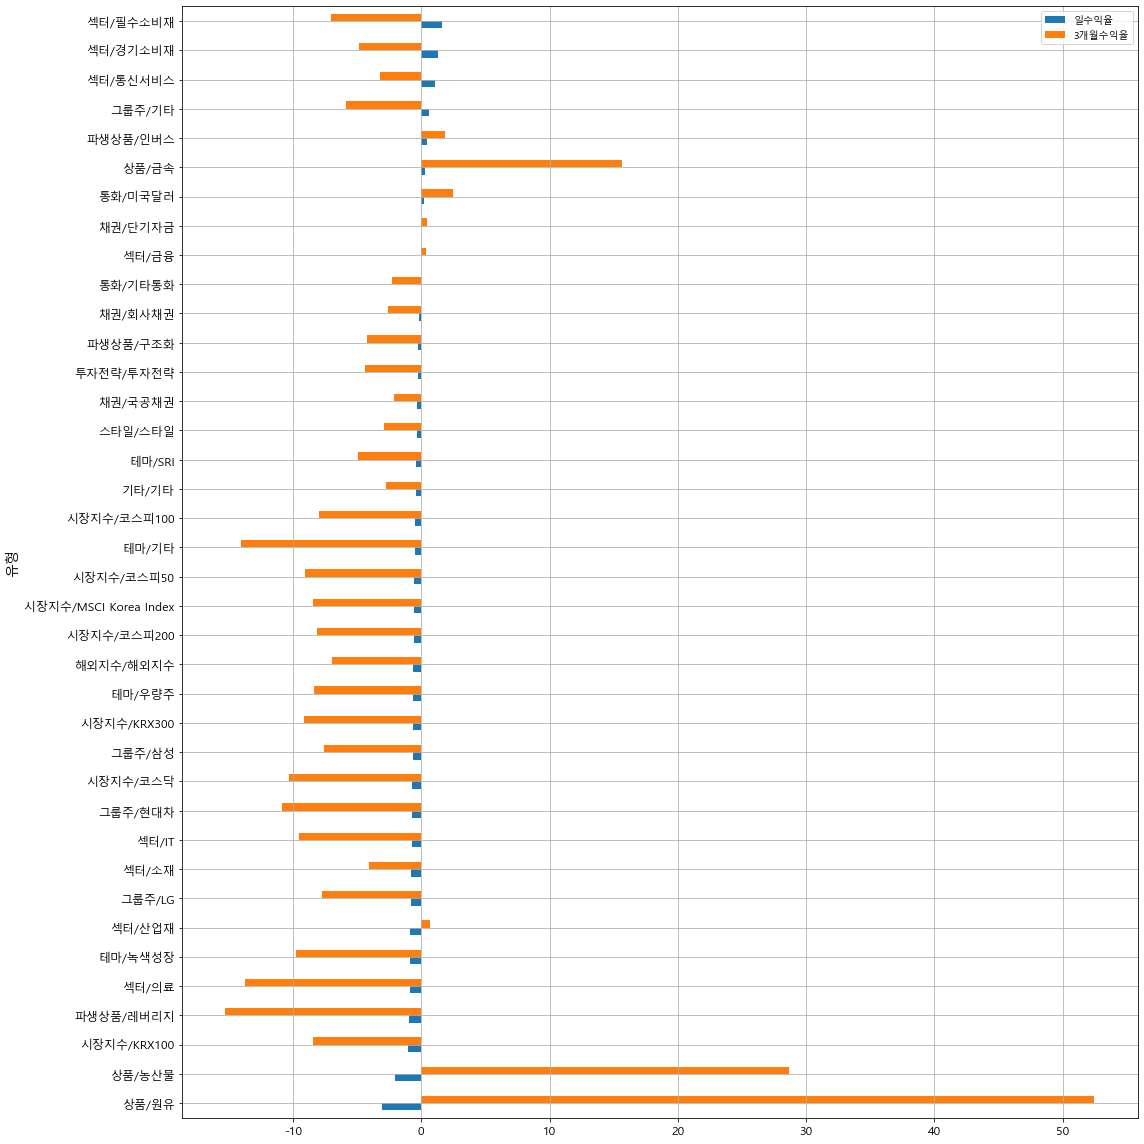

In [7]:
# 유형 별 수익율 순위 한눈에 보기
df.groupby(df['유형'])[['일수익율','3개월수익율']].mean().sort_values(by ='일수익율',ascending=True).plot.barh(figsize=(16,16))
from datetime import datetime
file_name = datetime.now().date().strftime("%y%b%d")
save_fig(f"Daily_유형별ETF수익율_{file_name}")

#### 유형, 종목명 등 조회
유형, 종목명 등 텍스트를 넣어서 조회 가능합니다.

In [8]:
df[df.종목명.str.contains('골드')]

,종목명,코드,유형,순자산,종가,거래량,3개월수익율,총보수,운용사,가격변동,일수익율,"거래금액/일,백만"
67,KODEX 골드선물(H),132030,상품/금속,2100,13080,186391,7.26,0.68,삼성자산운용,80,0.62,2065
206,TIGER 골드선물(H),319640,상품/금속,323,13985,27519,7.21,0.39,미래에셋자산운용,70,0.50,330
275,KINDEX 골드선물 레버리지(합성 H),225130,파생상품/레버리지,175,18995,10856,13.54,0.49,한국투자신탁운용,110,0.58,91
510,KODEX 골드선물인버스(H),280940,파생상품/인버스,40,6630,3696,-7.60,0.45,삼성자산운용,-10,-0.15,12
511,KODEX 골드선물인버스(H),280940,파생상품/인버스,40,6630,3696,-7.60,0.45,삼성자산운용,-10,-0.15,12


In [9]:
#상품 종류만 추려서 보기
df[(df.유형.str.contains('상품')) & (~df.유형.str.contains('파생상품'))] 

,종목명,코드,유형,순자산,종가,거래량,3개월수익율,총보수,운용사,가격변동,일수익율,"거래금액/일,백만"
67,KODEX 골드선물(H),132030,상품/금속,2100,13080,186391,7.26,0.68,삼성자산운용,80,0.62,2065
85,KODEX WTI원유선물(H),261220,상품/원유,1406,17125,541330,53.04,0.35,삼성자산운용,-535,-3.17,8849
111,KODEX 은선물(H),144600,상품/금속,924,5190,276857,12.83,0.68,삼성자산운용,25,0.49,697
170,TIGER 원유선물Enhanced(H),130680,상품/원유,466,5140,427324,51.85,0.69,미래에셋자산운용,-145,-2.87,2728
196,TIGER 농산물선물Enhanced(H),137610,상품/농산물,351,8150,60550,22.28,0.69,미래에셋자산운용,-100,-1.22,284
206,TIGER 골드선물(H),319640,상품/금속,323,13985,27519,7.21,0.39,미래에셋자산운용,70,0.50,330
226,TIGER 구리실물,160580,상품/금속,266,11295,21599,11.45,0.83,미래에셋자산운용,-75,-0.66,142
276,KINDEX KRX금현물,411060,상품/금속,174,10940,223062,8.75,0.50,한국투자신탁운용,70,0.64,1531
289,KODEX 구리선물(H),138910,상품/금속,155,8680,36442,9.73,0.68,삼성자산운용,-105,-1.21,97
301,KODEX 3대농산물선물(H),271060,상품/농산물,144,14585,36361,31.51,0.55,삼성자산운용,-255,-1.79,426


### 4. 차트 분석

그림 저장: ['271060', '219390']


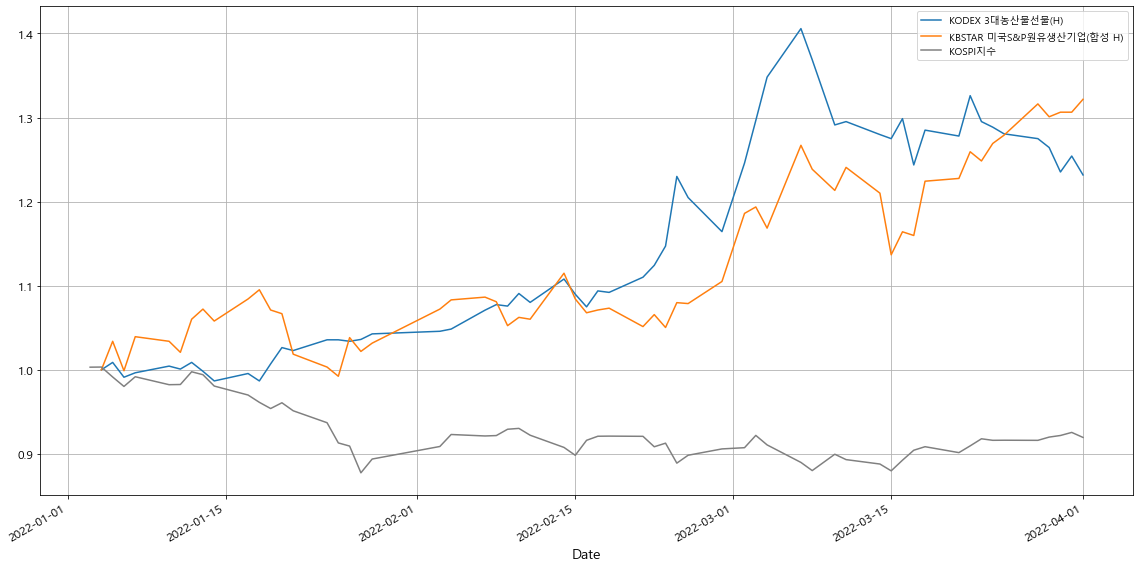

In [10]:
codes =['271060','219390']
price_plot(codes,90)
save_fig(f"{codes}")

#### 금일 상위 20개 종목 30일 차트 조회

그림 저장: Daily_Top20ETF_22Apr03


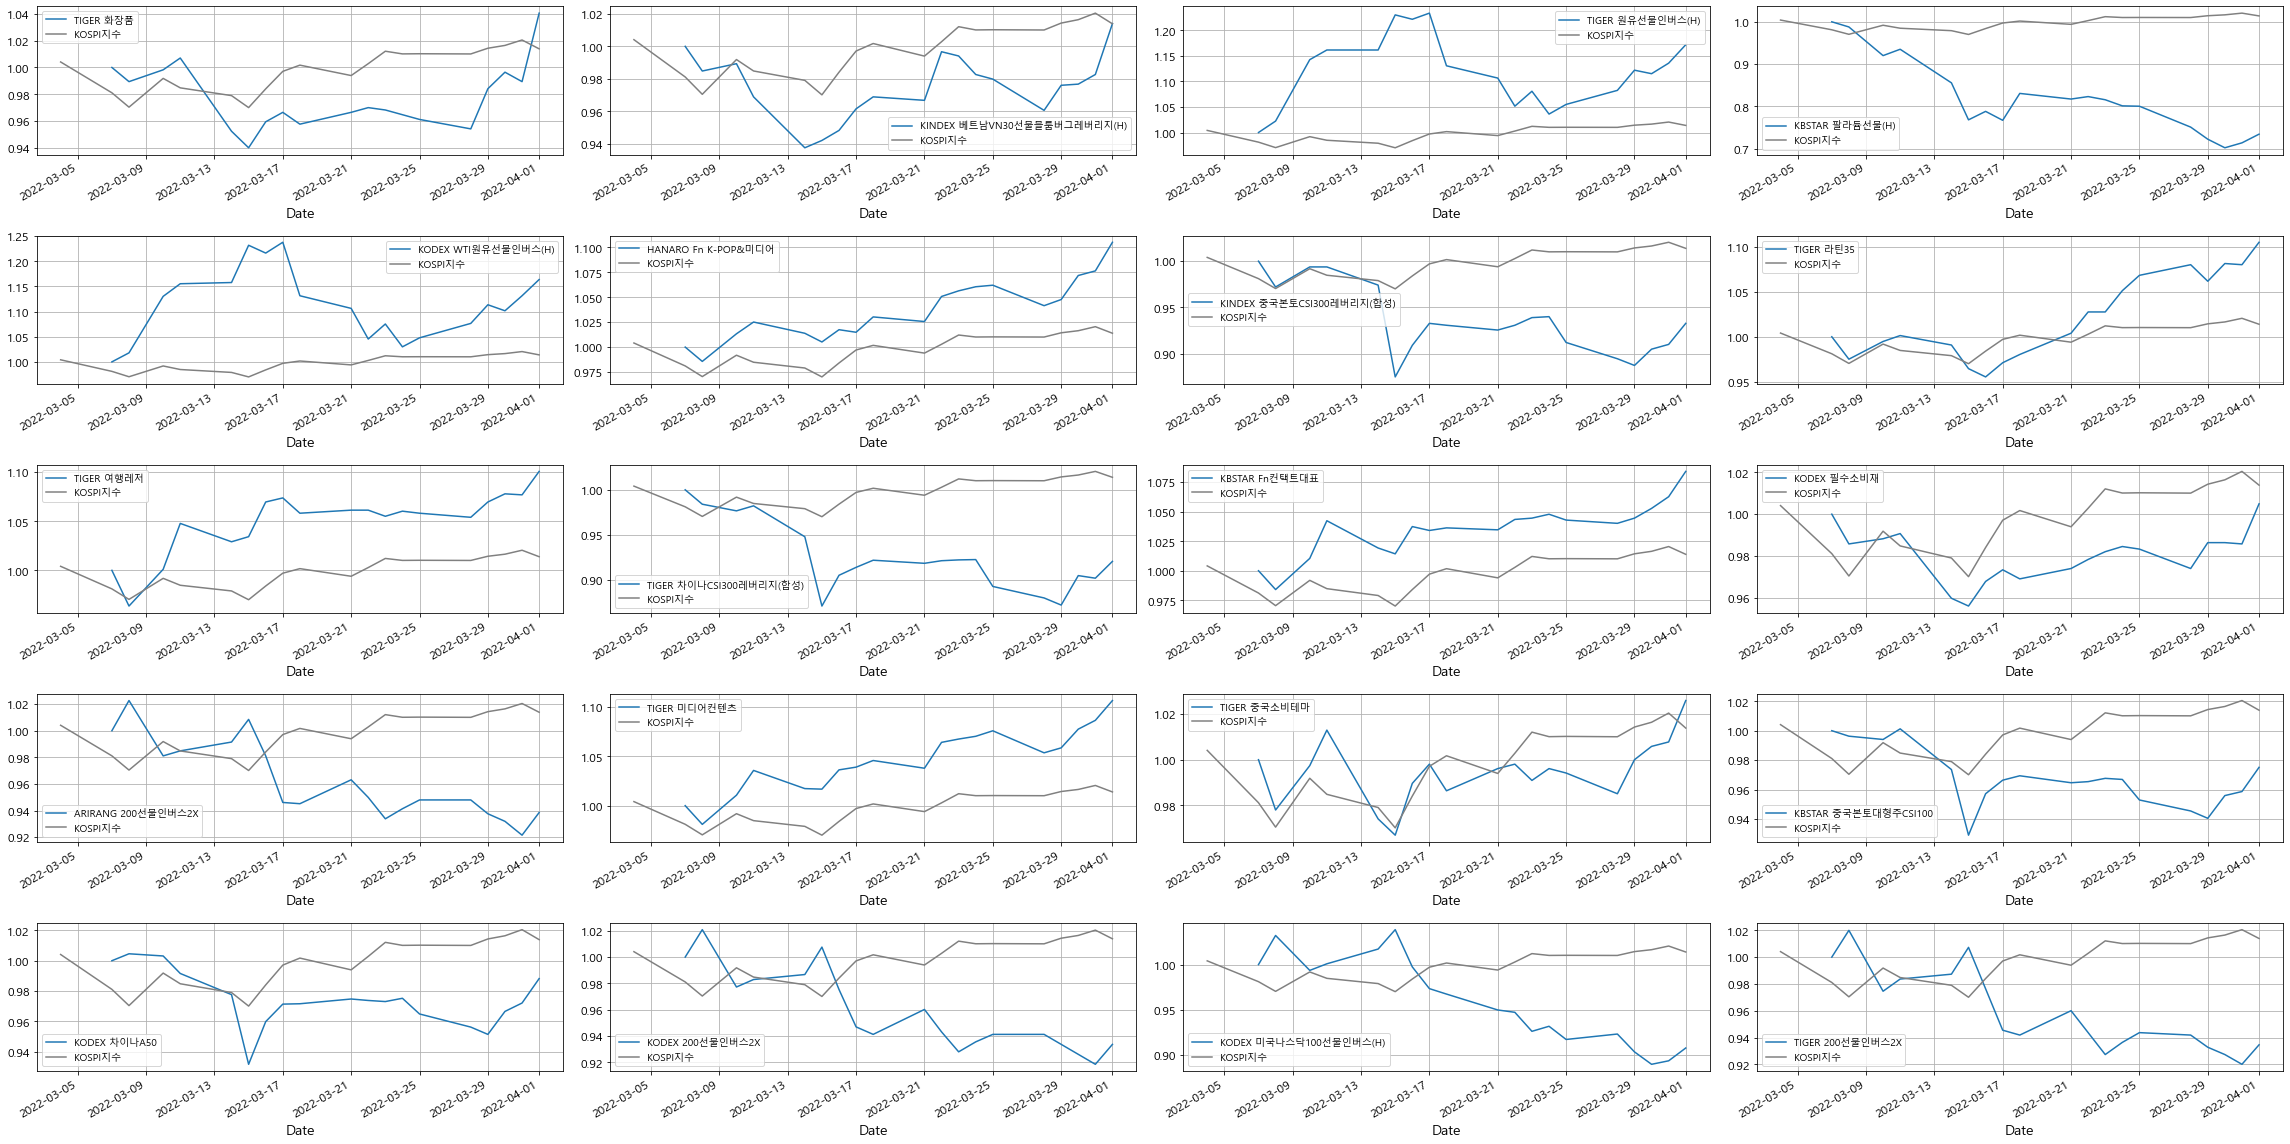

In [11]:
li = [code for code in df.sort_values('일수익율',ascending=False)[:20].코드]
price_plot_s(li,30,5,4,(32,16))# (리스트, 일자,행,열,차트크기)

from datetime import datetime
file_name = datetime.now().date().strftime("%y%b%d")
save_fig(f"Daily_Top20ETF_{file_name}")

#### 관심종목 30일 차트 조회

In [46]:
# 종목명 확인하기
print(df1.유형.unique())
print()
관심종목 = input('유형입력')

print()
print(f'해당종목 총 {len(df1[df1.유형.str.contains(관심종목)].종목명)}개')
df1[df1.유형.str.contains(관심종목)].종목명

['시장지수/코스피200' '채권/단기자금' '시장지수/MSCI Korea Index' '그룹주/삼성' '채권/회사채권'
 '테마/기타' '테마/우량주' '해외지수/해외지수' '섹터/IT' '시장지수/코스닥' '상품/원유' '스타일/스타일' '상품/금속'
 '채권/국공채권' '섹터/금융' '섹터/경기소비재' '섹터/의료' '테마/SRI' '시장지수/KRX300' '통화/미국달러'
 '기타/기타' '그룹주/현대차' '상품/농산물' '섹터/산업재' '섹터/소재' '투자전략/투자전략' '시장지수/코스피50'
 '섹터/필수소비재' '그룹주/LG' '시장지수/코스피100' '시장지수/KRX100' '그룹주/기타' '통화/기타통화'
 '섹터/통신서비스']



유형입력 우량주



해당종목 총 7개


15         TIGER TOP10
201       KODEX KTOP30
203       TIGER KTOP30
227          KOSEF 블루칩
277         TIGER 우량가치
310    KODEX FnKorea50
364        KBSTAR 우량업종
Name: 종목명, dtype: object

그림 저장: 상품_21Jan15


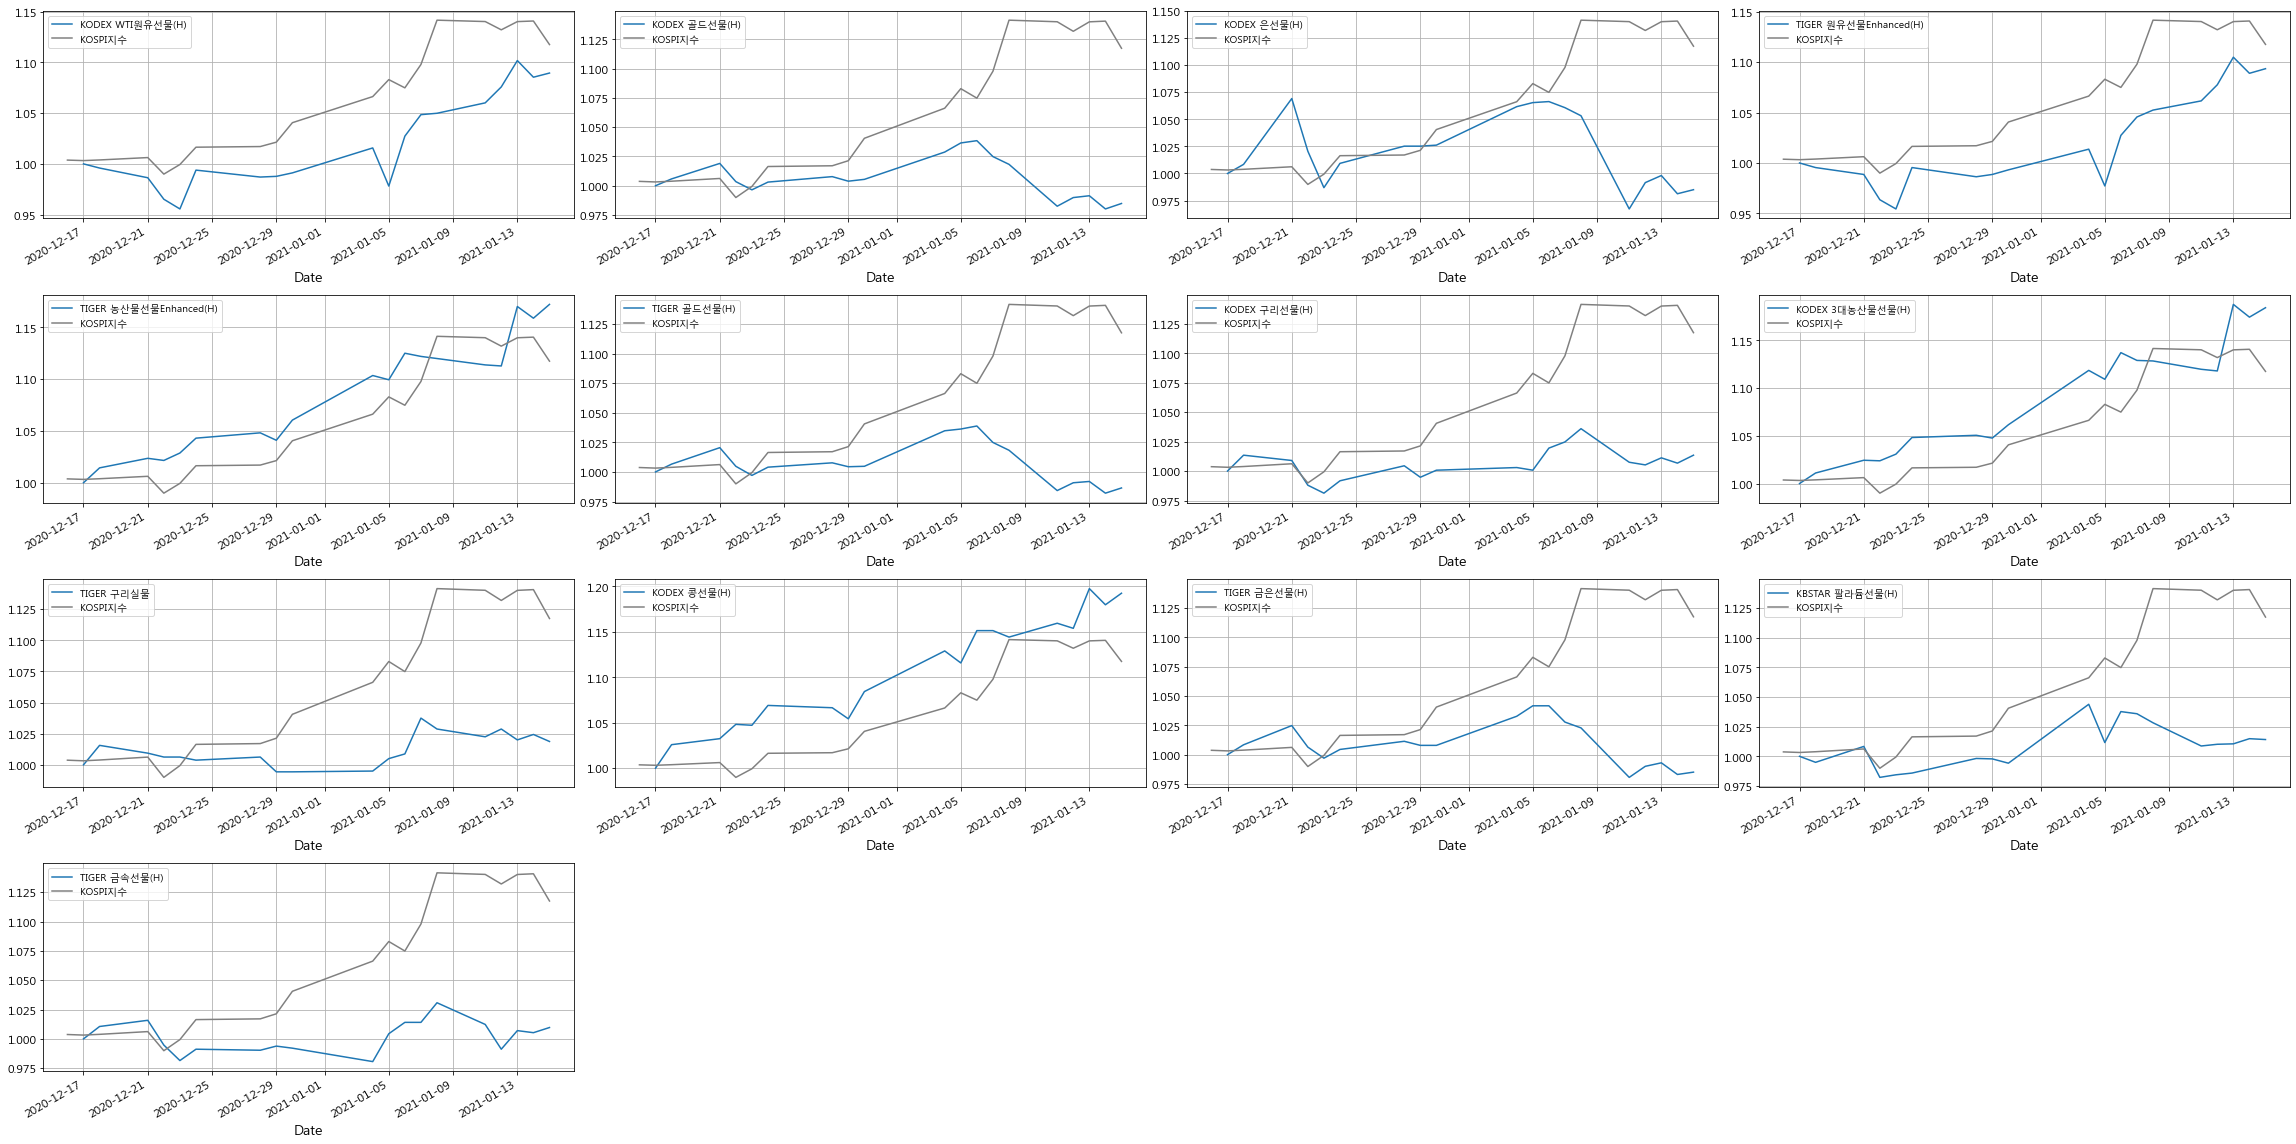

In [47]:
관심종목 = '상품'
li= [code for code in df1[df1.유형.str.contains(관심종목)].코드]
price_plot_s(li,30,4,4,(32,16))

from datetime import datetime
file_name = datetime.now().date().strftime("%y%b%d")
save_fig(f"{관심종목}_{file_name}")

### 5. 종목 별 가격 및 구성조회

#### 관심 종목 corr구하기 (kospi 비교)

In [14]:
# li = [code for code in df1[df1.유형.str.contains('상품')].코드]
df = price_codes(li,365)[1]
df.corr()

,KODEX WTI원유선물(H),TIGER 원유선물Enhanced(H),KBSTAR 팔라듐선물(H),KBSTAR 미국S&P원유생산기업(합성 H),KODEX 3대농산물선물(H),KODEX 미국S&P에너지(합성),KODEX 차이나H레버리지(H),TIGER 글로벌자원생산기업(합성 H),KOSEF 코스닥150선물레버리지,KODEX 미국S&P바이오(합성),...,KBSTAR 코스닥150선물레버리지,KODEX 운송,KODEX 미국채울트라30년선물인버스(H),TIGER KRX바이오K-뉴딜,TIGER 차이나바이오테크SOLACTIVE,KODEX 코스닥150레버리지,KODEX 구리선물(H),KODEX S&P글로벌인프라(합성),KOSPI,USD/KRW
KODEX WTI원유선물(H),1.000000,0.999844,-0.237071,0.895525,0.746732,0.948892,-0.749244,0.883815,-0.554055,-0.770259,...,-0.568015,-0.449711,-0.063770,-0.840378,-0.770006,-0.640719,0.513997,0.850490,-0.800821,0.802637
TIGER 원유선물Enhanced(H),0.999844,1.000000,-0.242672,0.895226,0.742466,0.946601,-0.753456,0.879578,-0.547926,-0.764798,...,-0.561877,-0.448502,-0.071707,-0.838129,-0.768288,-0.634822,0.511640,0.853920,-0.799624,0.806534
KBSTAR 팔라듐선물(H),-0.237071,-0.242672,1.000000,-0.391422,0.215212,-0.290605,0.670169,-0.047971,-0.263382,0.159082,...,-0.246272,0.616560,0.634869,0.439134,0.435496,-0.173517,0.185995,-0.573528,0.430900,-0.659438
KBSTAR 미국S&P원유생산기업(합성 H),0.895525,0.895226,-0.391422,1.000000,0.592643,0.922043,-0.661345,0.831828,-0.452192,-0.645320,...,-0.467428,-0.491698,-0.063654,-0.848890,-0.663959,-0.539534,0.475524,0.824351,-0.742816,0.726419
KODEX 3대농산물선물(H),0.746732,0.742466,0.215212,0.592643,1.000000,0.737449,-0.450419,0.843075,-0.657296,-0.757825,...,-0.663312,-0.187533,0.247148,-0.606364,-0.566057,-0.705259,0.681349,0.513690,-0.587534,0.443668
KODEX 미국S&P에너지(합성),0.948892,0.946601,-0.290605,0.922043,0.737449,1.000000,-0.722605,0.934998,-0.651711,-0.860424,...,-0.666574,-0.578095,0.044718,-0.930960,-0.841666,-0.737029,0.498158,0.844930,-0.882232,0.789459
KODEX 차이나H레버리지(H),-0.749244,-0.753456,0.670169,-0.661345,-0.450419,-0.722605,1.000000,-0.560191,0.168393,0.634284,...,0.187081,0.584293,0.528033,0.716498,0.770993,0.281487,-0.248588,-0.887775,0.745625,-0.962501
TIGER 글로벌자원생산기업(합성 H),0.883815,0.879578,-0.047971,0.831828,0.843075,0.934998,-0.560191,1.000000,-0.729371,-0.868712,...,-0.740547,-0.391255,0.218037,-0.836353,-0.734103,-0.796682,0.671135,0.741078,-0.751963,0.599648
KOSEF 코스닥150선물레버리지,-0.554055,-0.547926,-0.263382,-0.452192,-0.657296,-0.651711,0.168393,-0.729371,1.000000,0.726077,...,0.999642,0.208128,-0.567601,0.629757,0.514126,0.991486,-0.448348,-0.306493,0.617683,-0.248046
KODEX 미국S&P바이오(합성),-0.770259,-0.764798,0.159082,-0.645320,-0.757825,-0.860424,0.634284,-0.868712,0.726077,1.000000,...,0.738062,0.549369,-0.123462,0.838050,0.821563,0.795074,-0.471812,-0.660036,0.819879,-0.648745


In [55]:
df = price_texts('None','골드',20)[0]
df.tail(5)

해당종목은 ['KODEX 골드선물(H)', 'KINDEX 골드선물 레버리지(합성 H)', 'TIGER 골드선물(H)', 'KODEX 골드선물인버스(H)']입니다.


,KODEX 골드선물(H),KINDEX 골드선물 레버리지(합성 H),TIGER 골드선물(H),KODEX 골드선물인버스(H)
Date,,,,
2021-01-11,12630,18570,13450,7130
2021-01-12,12725,18755,13540,7075
2021-01-13,12745,18820,13555,7015
2021-01-14,12600,18430,13420,7085
2021-01-15,12660,18530,13480,7080


In [56]:
df.corr()

,KODEX 골드선물(H),KINDEX 골드선물 레버리지(합성 H),TIGER 골드선물(H),KODEX 골드선물인버스(H)
KODEX 골드선물(H),1.000000,0.997815,0.996555,-0.988730
KINDEX 골드선물 레버리지(합성 H),0.997815,1.000000,0.994072,-0.984185
TIGER 골드선물(H),0.996555,0.994072,1.000000,-0.986184
KODEX 골드선물인버스(H),-0.988730,-0.984185,-0.986184,1.000000


In [58]:
df1.head()

,종목명,코드,유형,순자산,종가,거래량,수익율,총보수,운용사,가격변동_x,일수익율_x,"거래금액/일,백만_x",가격변동_y,일수익율_y,"거래금액/일,백만_y"
0,KODEX 200,069500,시장지수/코스피200,55711,43505,11159419,37.68,0.15,삼성자산운용,-955,-2.20,461940,-955,-2.20,461940
1,TIGER 200,102110,시장지수/코스피200,31277,43480,2289636,37.62,0.05,미래에셋자산운용,-920,-2.12,81881,-920,-2.12,81881
2,KODEX 단기채권,153130,채권/단기자금,18357,102660,29467,0.15,0.15,삼성자산운용,5,0.00,3075,5,0.00,3075
3,KODEX MSCI Korea TR,278540,시장지수/MSCI Korea Index,17651,14115,1591664,39.00,0.15,삼성자산운용,-295,-2.09,9140,-295,-2.09,9140
4,KODEX 삼성그룹,102780,그룹주/삼성,17176,10975,610470,42.90,0.25,삼성자산운용,-170,-1.55,7950,-170,-1.55,7950


In [69]:
# 3개월 수익율 상위 10종목
li = [code for code in df1.sort_values('3개월수익율',ascending=False)[:10].코드]
df = price_codes(li,365)[1]
df.corr()

,TIGER KRX2차전지K-뉴딜,KODEX 2차전지산업,TIGER 2차전지테마,KODEX 200IT TR,KBSTAR 200IT,TIGER 200 IT,KBSTAR 미국S&P원유생산기업(합성 H),TIGER 현대차그룹+펀더멘털,KODEX 자동차,TIGER 200 에너지화학,KOSPI,USD/KRW
TIGER KRX2차전지K-뉴딜,1.000000,0.996614,0.993603,0.984551,0.984343,0.984708,0.907188,0.976801,0.977387,0.994169,0.980946,-0.742387
KODEX 2차전지산업,0.996614,1.000000,0.996991,0.991181,0.990890,0.991142,0.904764,0.976018,0.976696,0.986464,0.982473,-0.727813
TIGER 2차전지테마,0.993603,0.996991,1.000000,0.987459,0.987449,0.987504,0.902283,0.963390,0.966861,0.982872,0.981131,-0.726017
KODEX 200IT TR,0.984551,0.991181,0.987459,1.000000,0.999855,0.999874,0.900192,0.970914,0.972986,0.974351,0.983959,-0.736085
KBSTAR 200IT,0.984343,0.990890,0.987449,0.999855,1.000000,0.999900,0.898776,0.970527,0.972455,0.974207,0.983713,-0.736150
TIGER 200 IT,0.984708,0.991142,0.987504,0.999874,0.999900,1.000000,0.900830,0.971464,0.973456,0.974620,0.984441,-0.737633
KBSTAR 미국S&P원유생산기업(합성 H),0.907188,0.904764,0.902283,0.900192,0.898776,0.900830,1.000000,0.905773,0.910081,0.919849,0.950554,-0.831266
TIGER 현대차그룹+펀더멘털,0.976801,0.976018,0.963390,0.970914,0.970527,0.971464,0.905773,1.000000,0.995909,0.974076,0.972448,-0.742247
KODEX 자동차,0.977387,0.976696,0.966861,0.972986,0.972455,0.973456,0.910081,0.995909,1.000000,0.975488,0.975715,-0.735927
TIGER 200 에너지화학,0.994169,0.986464,0.982872,0.974351,0.974207,0.974620,0.919849,0.974076,0.975488,1.000000,0.980103,-0.764241


In [33]:
# 3개월 수익율 하위 10종목
li = [code for code in df1.sort_values('3개월수익율',ascending=True)[:10].코드]
df = price_codes(li,365)
df[1].corr()

,KODEX 코스닥150롱코스피200숏선물,TIGER 의료기기,TIGER 미국채10년선물,KODEX 미국채울트라30년선물(H),KODEX 미국채10년선물,KBSTAR 미국장기국채선물(H),ARIRANG 미국장기우량회사채,KOSEF 미국달러선물,TIGER 미국달러단기채권액티브,KBSTAR 미국고정배당우선증권ICE TR,KOSPI,USD/KRW
KODEX 코스닥150롱코스피200숏선물,1.000000,0.468053,0.848797,0.806266,0.854193,0.859317,0.869088,0.823502,0.827228,0.849052,-0.698971,0.823287
TIGER 의료기기,0.468053,1.000000,0.304026,0.249875,0.299521,0.286992,0.227508,0.275033,0.276497,0.297910,-0.204774,0.268058
TIGER 미국채10년선물,0.848797,0.304026,1.000000,0.835960,0.998939,0.904043,0.937410,0.995955,0.996455,0.928137,-0.787717,0.992567
KODEX 미국채울트라30년선물(H),0.806266,0.249875,0.835960,1.000000,0.839937,0.978293,0.912918,0.792123,0.796016,0.785288,-0.786362,0.790649
KODEX 미국채10년선물,0.854193,0.299521,0.998939,0.839937,1.000000,0.905980,0.940699,0.994588,0.995200,0.930133,-0.781604,0.991504
KBSTAR 미국장기국채선물(H),0.859317,0.286992,0.904043,0.978293,0.905980,1.000000,0.940563,0.869431,0.872164,0.849651,-0.834449,0.867033
ARIRANG 미국장기우량회사채,0.869088,0.227508,0.937410,0.912918,0.940699,0.940563,1.000000,0.919367,0.923894,0.926223,-0.707353,0.920750
KOSEF 미국달러선물,0.823502,0.275033,0.995955,0.792123,0.994588,0.869431,0.919367,1.000000,0.999507,0.923541,-0.767622,0.995903
TIGER 미국달러단기채권액티브,0.827228,0.276497,0.996455,0.796016,0.995200,0.872164,0.923894,0.999507,1.000000,0.927168,-0.763857,0.995873
KBSTAR 미국고정배당우선증권ICE TR,0.849052,0.297910,0.928137,0.785288,0.930133,0.849651,0.926223,0.923541,0.927168,1.000000,-0.665186,0.922619


In [34]:
price_codes(li,365)[1]

,KODEX 코스닥150롱코스피200숏선물,TIGER 의료기기,TIGER 미국채10년선물,KODEX 미국채울트라30년선물(H),KODEX 미국채10년선물,KBSTAR 미국장기국채선물(H),ARIRANG 미국장기우량회사채,KOSEF 미국달러선물,TIGER 미국달러단기채권액티브,KBSTAR 미국고정배당우선증권ICE TR,KOSPI,USD/KRW
Date,,,,,,,,,,,,
2020-08-21,1.000000,1.758160,1.115130,1.191132,1.110711,1.154545,1.127296,1.030575,1.031408,1.032631,1.026278,1.030169
2020-08-24,1.025381,1.823155,1.120865,1.205768,1.115662,1.158636,1.138492,1.032636,1.032928,1.032631,1.037518,1.027524
2020-08-25,1.030964,1.840924,1.115130,1.197589,1.108011,1.150909,1.128133,1.029339,1.028875,1.034639,1.053950,1.026391
2020-08-26,1.036041,1.854017,1.112042,1.184675,1.108461,1.147727,1.124470,1.030987,1.032421,1.038153,1.055104,1.023833
2020-08-27,1.028426,1.871785,1.113366,1.185536,1.109811,1.144091,1.123110,1.029339,1.030902,1.038153,1.044029,1.026469
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,0.856345,1.856355,1.011028,1.097718,1.024302,1.079091,1.018155,0.952695,0.950355,0.971386,1.402065,0.948488
2021-01-12,0.863452,1.834378,1.010587,1.094705,1.020252,1.080455,1.019829,0.954755,0.954407,0.964859,1.392046,0.946111
2021-01-13,0.857360,1.845600,1.007940,1.097288,1.018452,1.081818,1.009784,0.950635,0.950861,0.958333,1.401994,0.948393


In [195]:
li = [code for code in df.코드[:20]]
df_t = price_codes(li,30)
df_t[1].tail(5)

,KODEX 200,TIGER 200,KODEX 단기채권,TIGER MSCI Korea TR,KODEX 200선물인버스2X,KODEX MSCI Korea TR,KODEX 삼성그룹,KODEX 레버리지,KODEX 200TR,KODEX 종합채권(AA-이상)액티브,KBSTAR 200,KODEX 코스닥150 레버리지,KODEX 인버스,KODEX 단기채권PLUS,ARIRANG 200,TIGER 단기통안채,KINDEX 200,KOSEF 200,HANARO 200,TIGER 미국나스닥100
Date,,,,,,,,,,,,,,,,,,,,
2021-01-06,1.098975,1.098045,1.000390,1.093915,0.822300,1.093854,1.114458,1.204087,1.104114,0.998003,1.099407,1.067348,0.906593,1.000583,1.098941,1.00035,1.098724,1.099690,1.098087,1.015955
2021-01-07,1.124595,1.123129,1.000536,1.116402,0.782230,1.116694,1.139650,1.262740,1.125105,0.998638,1.125135,1.080753,0.885714,1.000632,1.124413,1.00035,1.125991,1.125286,1.124899,1.021971
2021-01-08,1.174353,1.173432,1.000536,1.172288,0.710801,1.173588,1.190033,1.377885,1.176742,0.998275,1.175647,1.093840,0.846154,1.000681,1.175627,1.00040,1.175688,1.175401,1.173808,1.045293
2021-01-11,1.177319,1.176129,1.000585,1.178902,0.709059,1.183140,1.192771,1.386058,1.178421,0.999682,1.178206,1.097670,0.843956,1.000632,1.177236,1.00045,1.179987,1.179577,1.176233,1.056665
2021-01-12,1.156149,1.155765,1.000634,1.160053,0.735192,1.155731,1.168675,1.331490,1.156591,0.998911,1.156519,1.079796,0.860440,1.000632,1.155919,1.00040,1.157690,1.157483,1.155888,1.049166


#### 구성종목 확인하기

In [72]:
comp(['228810','228800'])

,TIGER 미디어컨텐츠,구성비중1,등락률1,TIGER 여행레저,구성비중2,등락률2
1,CJ CGV,12.10%,-2.07%,파라다이스,10.13%,+0.90%
2,스튜디오드래곤,11.05%,-3.20%,강원랜드,9.81%,-1.75%
3,CJ ENM,10.38%,-2.76%,하나투어,9.70%,+1.41%
4,JYP Ent.,9.13%,-2.16%,호텔신라,9.23%,0.00%
5,제이콘텐트리,9.05%,-2.63%,한진칼,8.16%,-1.63%
9,에스엠,8.27%,-3.24%,GKL,8.08%,-2.70%
10,와이지엔터테인먼트,8.25%,-3.19%,롯데관광개발,7.77%,+2.57%
11,초록뱀,6.23%,-2.18%,아난티,7.58%,-1.47%
12,지니뮤직,4.48%,+14.26%,모두투어,5.55%,0.00%
13,키이스트,4.13%,-7.14%,진에어,4.52%,-2.54%


In [8]:
# 종목명 확인하기
print(df1.유형.unique())
print()
관심종목 = input('유형입력')

print()
print(f'해당종목 총 {len(df1[df1.유형.str.contains(관심종목)].종목명)}개')
df1[df1.유형.str.contains(관심종목)].종목명

['시장지수/코스피200' '채권/단기자금' '시장지수/MSCI Korea Index' '그룹주/삼성' '채권/회사채권'
 '테마/기타' '테마/우량주' '해외지수/해외지수' '섹터/IT' '시장지수/코스닥' '상품/원유' '스타일/스타일' '상품/금속'
 '채권/국공채권' '섹터/금융' '섹터/경기소비재' '섹터/의료' '테마/SRI' '시장지수/KRX300' '통화/미국달러'
 '기타/기타' '그룹주/현대차' '상품/농산물' '섹터/산업재' '섹터/소재' '투자전략/투자전략' '시장지수/코스피50'
 '섹터/필수소비재' '그룹주/LG' '시장지수/코스피100' '시장지수/KRX100' '그룹주/기타' '통화/기타통화'
 '섹터/통신서비스']



유형입력 해외



해당종목 총 73개


17          TIGER 미국나스닥100
29     KODEX 선진국MSCI World
32         TIGER 차이나CSI300
33      KODEX 미국FANG플러스(H)
37      KINDEX 베트남VN30(합성)
              ...         
337     KODEX MSCI EM선물(H)
340      KODEX 멀티에셋하이인컴(H)
341     KBSTAR 차이나HSCEI(H)
346    TIGER S&P글로벌인프라(합성)
363      ARIRANG S&P글로벌인프라
Name: 종목명, Length: 73, dtype: object

In [25]:
df1[df1.종목명.str.contains('미국다우')]

,종목명,코드,유형,순자산,종가,거래량,3개월수익율,총보수,운용사,가격변동,일수익율,"거래금액/일,백만"
103,TIGER 미국다우존스30,245340,해외지수/해외지수,429,17180,24550,4.07,0.35,미래에셋자산운용,-165,-0.96,337
296,KINDEX 미국다우존스리츠(합성 H),181480,기타/기타,75,76190,325,1.32,0.30,한국투자신탁운용,-725,-0.95,28
304,ARIRANG 미국다우존스고배당주(합성 H),213630,해외지수/해외지수,70,13275,4641,17.06,0.40,한화자산운용,45,0.34,52


In [26]:
comp_e(['245340'])

,TIGER 미국다우존스30,주식수1
1,3M CO,310.0
2,AMERICAN EXPRESS CO,310.0
3,AMGEN INC,310.0
4,APPLE INC,310.0
5,BOEING CO/THE,310.0
9,CATERPILLAR INC,310.0
10,CHEVRON CORP,310.0
11,CISCO SYSTEMS INC,310.0
12,COCA-COLA CO/THE,310.0
13,DOW INC,310.0


In [21]:
li_ = df1[df1.종목명.str.contains('미국')].sort_values(by='총보수')[:20]
li = li_.코드
li_

,종목명,코드,유형,순자산,종가,거래량,3개월수익율,총보수,운용사,가격변동,일수익율,"거래금액/일,백만"
17,TIGER 미국나스닥100,133690,해외지수/해외지수,6192,63795,155566,2.37,0.07,미래에셋자산운용,-425,-0.67,5997
58,TIGER 미국S&P500,360750,해외지수/해외지수,1245,10585,374624,4.09,0.07,미래에셋자산운용,-100,-0.94,2980
64,KINDEX 미국S&P500,360200,해외지수/해외지수,1077,10705,194884,4.03,0.07,한국투자신탁운용,-100,-0.93,2788
263,KODEX 미국S&P산업재(합성),200030,해외지수/해외지수,92,17350,2815,7.93,0.25,삼성자산운용,40,0.23,4
290,KODEX 미국S&P바이오(합성),185680,해외지수/해외지수,80,35320,3026,16.34,0.25,삼성자산운용,920,2.60,150
65,KODEX 미국S&P500선물(H),219480,해외지수/해외지수,1066,18270,77317,8.62,0.25,삼성자산운용,-190,-1.04,2418
80,KODEX 미국달러선물,261240,통화/미국달러,677,9730,122876,-4.00,0.25,삼성자산운용,10,0.10,840
83,KBSTAR 미국S&P원유생산기업(합성 H),219390,해외지수/해외지수,646,3050,669362,51.36,0.25,케이비자산운용,75,2.46,2444
85,TIGER 미국MSCI리츠(합성 H),182480,해외지수/해외지수,635,12070,18733,5.12,0.25,미래에셋자산운용,85,0.70,362
173,KODEX 미국S&P에너지(합성),218420,해외지수/해외지수,175,5610,56999,34.05,0.25,삼성자산운용,100,1.78,921


In [22]:
comp_e([code for code in li])


,TIGER 미국나스닥100,주식수1,TIGER 미국S&P500,주식수2,KINDEX 미국S&P500,주식수3,KODEX 미국S&P500선물(H),주식수6,TIGER 미국달러단기채권액티브,주식수12,KODEX 다우존스미국리츠(H),주식수13,TIGER 미국나스닥바이오,주식수14,ARIRANG 미국S&P500(H),주식수16,KBSTAR KRX300미국달러선물혼합,주식수17,TIGER 미국S&P500선물(H),주식수19
1,APPLE INC,5264.0,APPLE INC,471.0,APPLE Inc,455.0,USD 예금,6298,KDB 4 ⅝ 11/16/21 CORP,22480,ANNALY CAPITAL MANAGEMENT IN,1231.0,GILEAD SCIENCES INC,1827.0,APPLE Inc,646.0,KBSTAR KRX300,3363,ISHARES CORE S&P 500 ETF,67
2,MICROSOFT CORP,2341.0,GENERAL ELECTRIC CO,258.0,GENERAL ELECTRIC CO,249.0,SPDR S&P500 ETF,218,T 1 3/8 05/31/21,15420,WEYERHAEUSER CO,657.0,OPKO HEALTH INC,979.0,GENERAL ELECTRIC CO,354.0,KOSEF 미국달러선물,643,SPDR S&P 500 ETF TRUST,58
3,COMCAST CORP-CLASS A,2151.0,BANK OF AMERICA CORP,225.0,BANK OF AMERICA CORP,217.0,S&P500 E-MINI F2103,4,T 1 5/8 06/30/21,15420,PROLOGIS INC,651.0,ASTRAZENECA PLC-SPONS ADR,714.0,BANK OF AMERICA CORP,308.0,NaN,NaN,S&P500 EMINI FUT MAR 2021,5
4,SIRIUS XM HOLDINGS INC,2002.0,MICROSOFT CORP,223.0,MICROSOFT,215.0,미국달러 F 202102,-23,T 2 ⅝ 05/15/21 GOVT,15420,HOST HOTELS & RESORTS INC,621.0,AMGEN INC,601.0,MICROSOFT,306.0,NaN,NaN,미달러선물21년01월물,-10
5,CISCO SYSTEMS INC,1991.0,AT&T INC,210.0,AT&T INC,203.0,원화현금,-,APPLE INC,7710,INVITATION HOMES,493.0,MODERNA INC,577.0,AT&T INC,288.0,NaN,NaN,원화현금,-
9,INTEL CORP,1931.0,PFIZER INC,164.0,PFIZER INC,158.0,설정현금액,-,MICROSOFT CORP,7710,HEALTHPEAK PROPERTIES INC,474.0,ROYALTY PHARMA PLC- CL A,566.0,ISHARES 1-3 YEAR TREASURY BO,278.0,NaN,NaN,설정현금액,-
10,FACEBOOK INC-CLASS A,744.0,COMCAST CORP-CLASS A,135.0,COMCAST CORP,130.0,NaN,NaN,원화현금,-,MEDICAL PROPERTIES TRUST INC,472.0,AMARIN CORP PLC -ADR,562.0,PFIZER INC,225.0,NaN,NaN,NaN,NaN
11,MONDELEZ INTERNATIONAL INC-A,674.0,CISCO SYSTEMS INC,125.0,CISCO SYSTEMS INC,120.0,NaN,NaN,설정현금액,-,VICI PROPERTIES INC,472.0,EXELIXIS INC,453.0,COMCAST CORP,185.0,NaN,NaN,NaN,NaN
12,KEURIG DR PEPPER INC,663.0,EXXON MOBIL CORP,125.0,EXXON MOBIL CORP,120.0,NaN,NaN,NaN,NaN,AGNC INVESTMENT,460.0,GERON CORP,453.0,CISCO SYSTEMS INC,171.0,NaN,NaN,NaN,NaN
13,PEPSICO INC,651.0,VERIZON COMMUNICATIONS INC,122.0,VERIZON COMMUNICATIONS INC,118.0,NaN,NaN,NaN,NaN,AMERICAN TOWER CORP,391.0,THERAPEUTICSMD INC,437.0,EXXON MOBIL CORP,171.0,NaN,NaN,NaN,NaN


In [20]:
price_plot_s(li,30,5,4,(32,16))

점검 = '미국ETF'
from datetime import datetime
file_name = datetime.now().date().strftime("%y%b%d")
save_fig(f"{점검}_{file_name}")

ImportError: html5lib not found, please install it

In [21]:
df = price_codes(li,365)[1]
미국corr_365 = mkfile('미국corr_365')
df.corr().to_excel(미국corr_365, encoding='euckr')
df.corr()

ImportError: html5lib not found, please install it

In [23]:
comp([code for code in df1[df1.유형.str.contains('경기소비재')].코드])

,KODEX 자동차,구성비중1,등락률1,TIGER 여행레저,구성비중2,등락률2,TIGER 미디어컨텐츠,구성비중3,등락률3,TIGER 경기방어,...,등락률7,KODEX 경기소비재,구성비중8,등락률8,TIGER 200 경기소비재,구성비중9,등락률9,KBSTAR 200경기소비재,구성비중10,등락률10
1,기아,21.70%,-0.55%,강원랜드,10.19%,-1.44%,JYP Ent.,10.97%,+0.76%,셀트리온,...,+1.96%,LG전자,17.91%,-1.98%,기아,19.82%,-0.55%,기아,20.24%,-0.55%
2,현대모비스,19.68%,+0.24%,아시아나항공,10.17%,+0.24%,에스엠,10.82%,+2.00%,삼성바이오로직스,...,+1.01%,코웨이,8.90%,+4.63%,현대차,19.04%,+1.48%,현대차,19.29%,+1.48%
3,현대차,19.60%,+1.48%,호텔신라,9.64%,-1.60%,하이브,9.21%,+1.96%,SK텔레콤,...,+2.00%,강원랜드,7.83%,-1.44%,현대모비스,17.26%,+0.24%,현대모비스,17.60%,+0.24%
4,한온시스템,9.50%,-1.30%,한진칼,9.15%,+3.60%,스튜디오드래곤,9.19%,+1.12%,KT&G,...,+0.76%,HLB,7.02%,-3.08%,코웨이,4.99%,+4.63%,코웨이,4.92%,+4.63%
5,한국타이어앤테크놀로지,7.61%,-1.31%,하나투어,9.08%,-3.70%,CJ ENM,9.01%,+1.01%,LG생활건강,...,+1.12%,호텔신라,5.54%,-1.60%,강원랜드,4.40%,-1.44%,강원랜드,4.32%,-1.44%
9,만도,4.43%,-1.69%,파라다이스,8.37%,-2.95%,위지윅스튜디오,8.39%,+5.63%,한국전력,...,+5.63%,F&F,5.35%,+5.35%,한온시스템,3.86%,-1.30%,한온시스템,3.79%,-1.30%
10,현대위아,2.93%,+0.67%,롯데관광개발,7.02%,-1.08%,와이지엔터테인먼트,8.02%,+0.61%,KT,...,+0.61%,신세계,4.18%,-1.14%,호텔신라,3.11%,-1.60%,호텔신라,3.07%,-1.60%
11,NaN,NaN,NaN,아난티,5.71%,-0.12%,CJ CGV,5.85%,-3.74%,아모레퍼시픽,...,-0.36%,휠라홀딩스,3.70%,-0.44%,한국타이어앤테크놀로지,3.10%,-1.31%,한국타이어앤테크놀로지,3.03%,-1.31%
12,명신산업,2.01%,-0.42%,제주항공,5.24%,-1.58%,제이콘텐트리,4.91%,-0.36%,LG유플러스,...,-0.37%,CJ ENM,3.37%,+1.01%,신세계,2.35%,-1.14%,신세계,2.27%,-1.14%
13,금호타이어,1.96%,-0.13%,GKL,5.18%,-1.67%,덱스터,4.27%,+0.21%,유한양행,...,+0.36%,효성티앤씨,2.67%,-1.87%,휠라홀딩스,2.08%,-0.44%,휠라홀딩스,2.05%,-0.44%


In [22]:
comp([code for code in df2.sort_values('일수익율',ascending=False)[:20].code])

AttributeError: 'DataFrame' object has no attribute 'code'

In [ ]:
# import tarfile
# import os

# def create_tgzfile(output_filename, source_dir,item_list):
#        os.chdir(source_dir)
#        tar = tarfile.open(output_filename+".tgz", "w:gz")
#        for name in item_list:
#            tar.add(name)
#        tar.close()


# create_tgzfile("ETF","./",["ETF.txt"])


In [ ]:
# 추출 및 수집 : 최초원본 
# from selenium import webdriver
# from bs4 import BeautifulSoup
# import time
# import pandas as pd
# import os

# PROJECT_ROOT_DIR = "./fdr_output"
# CHAPTER_ID = "stock_check"
# SAMPLES_PATH = os.path.join(PROJECT_ROOT_DIR, "samples", CHAPTER_ID)
# os.makedirs(SAMPLES_PATH, exist_ok=True)

# def mkfile(file): #파일 경로 생성함수
#     file = os.path.join(SAMPLES_PATH,f'{file}.csv')
#     return file

# etf = mkfile('etf') 

# try:
#     # 홈페이지에 접근하여 ETF 항목 클릭
#     driver=webdriver.Chrome("./chromedriver.exe")
#     driver.get("http://seibro.or.kr/websquare/control.jsp?w2xPath=/IPORTAL/user/etf/BIP_CNTS06025V.xml&menuNo=174")
#     time.sleep(5)
#     a=driver.find_element_by_xpath('//*[@id="image10"]')
#     a.click()
#     path = 'ETF.txt'
#     if os.path.exists(path):os.remove(path)

#     # 페이지 넘김
#     i=1

#     while True: 
#         time.sleep(1)
#         a=driver.find_element_by_xpath('//*[@id="pageList1_page_%d"]'%i)
#         a.click()

#         time.sleep(2)
#         html=driver.page_source
#         soup=BeautifulSoup(html,"html.parser")

#         f = open("ETF.txt", 'a')
#         for anchors in soup.select("#grid1_body_tbody")[0]:
#             for anchor in anchors.select("td"):
#                 data = anchor.get_text()+'\n'
#                 f.write(data)
#         f.close()
#         i+=1
    
    
# # 더이상 읽을 테이지 없을 때, 
# except:
#     # 리스트화 하여 항목을 담아주고, 딕셔너리로 변환하여, 판다스 DF만들기
#     df = pd.DataFrame()
#     cols = ['종목명','코드','유형','순자산','종가','거래량','수익율','총보수','운용사']
#     종목명 = [] #1;
#     코드 = [] #2
#     유형 = [] #3
#     순자산 =[] #4
#     종가 =[] #5
#     거래량 = [] #6
#     수익율 = [] #9
#     총보수 = [] #15
#     운용사 = [] #16
#     with open('ETF.txt','r') as f:
#         data = f.readlines()
#         for i, j in enumerate(data):
#             if i % 17 == 1:종목명.append(j.replace('\n',''))
#             elif i % 17 ==2:코드.append(j.replace('\n',''))
#             elif i % 17 ==3:유형.append(j.replace('\n',''))
#             elif i % 17 ==4:순자산.append(j.replace('\n',''))
#             elif i % 17 ==5:종가.append(j.replace('\n',''))
#             elif i % 17 ==6:거래량.append(j.replace('\n',''))
#             elif i % 17 ==9:수익율.append(j.replace('\n',''))
#             elif i % 17 ==15:총보수.append(j.replace('\n',''))
#             elif i % 17 ==16:운용사.append(j.replace('\n',''))      
#     data = {'종목명':종목명,'코드':코드,'유형':유형,'순자산':순자산,'종가':종가,'거래량':거래량,'수익율':수익율,'총보수':총보수,'운용사':운용사}
#     df = pd.DataFrame(data, columns = cols)

#     # 보수, 수익율 없는 상품 제거하기
#     df = df.drop(df[df['총보수']==''].index)
#     df = df.drop(df[df['수익율']==''].index)

#     # 전처리 : 계산 가능한 값으로 변환하기
#     df['거래량']=df['거래량'].apply(lambda x: x.replace(',',''))
#     df['종가']=df['종가'].apply(lambda x: x.replace(',',''))
#     df['순자산']=df['순자산'].apply(lambda x: x.replace(',',''))
#     df['거래량']=df['거래량'].astype(int)
#     df['종가']=df['종가'].astype(int)
#     df['순자산']=df['순자산'].astype(int)
#     df['수익율']=df['수익율'].astype(float)
#     df['총보수']=df['총보수'].astype(float)

#     # 전처리 : 5개 자리인 코드를 6개자리로 변환
#     df['코드'] = df['코드'].astype(str)
#     code = [i for i in df[df['코드'].apply(lambda x: len(x))<=5].index]
#     df.loc[code,'코드'] = '0'+ df.loc[code,'코드'].astype(str)

#     df.to_csv(etf,sep=',',encoding='euc-kr')
    
#     print('연산이 끝났습니다')
#     print(f'추출한 총 ETF의 수 {len(df)}개')